# <b>CS156 (Introduction to AI), Fall 2022</b>
# <u><b>Homework 5 submission</b></u>

### Roster Name: Rohan Athalye
### Student ID: 014099982
### Email address: rohan.athalye@sjsu.edu

##  <u>References and sources </u>

DecisionTrees.Breast.ipynb from Canvas under Files/Example Jupyter Notebooks

https://pbpython.com/categorical-encoding.html

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [ ]:
np.random.seed(42)

#### Code the solution

#### Load the dataset

In [ ]:
# Mounts Google Drive in Google Colab.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
csv_file = "/content/drive/MyDrive/Fall 2022/CS 156/Homework/Homework 5/homework5_input_data.csv"
airline_df = pd.read_csv(csv_file)
X = airline_df.iloc[:, 0:22] # Gets input data.
Y = airline_df["satisfaction"] # Gets class labels.

#### Convert categorical variables to numeric format

In [ ]:
X = pd.get_dummies(X, columns=["Gender", "Customer Type", "Type of Travel", "Class"], prefix=["Gender", "Customer Type", "Type of Travel", "Class"])

#### Break the data into training and test datasets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#### Train a decision tree model and report 5-fold cross-validation accuracies

In [ ]:
model = DecisionTreeClassifier(random_state=0) # Trains a decision tree model to predict the class variable.

cross_val_scores = cross_val_score(model, X_train, Y_train, cv=5) # Gets accuracies for each fold.
print("Individual cross-validation accuracies: [{:.8f}, {:.8f}, {:.8f}, {:.8f}, {:.8f}]".format(cross_val_scores[0], cross_val_scores[1], cross_val_scores[2], cross_val_scores[3], cross_val_scores[4]))
print("Mean cross-validation accuracy: " + str(cross_val_scores.mean())) # Gets average accuracy across all folds.

Individual cross-validation accuracies: [0.94365008, 0.94129713, 0.94449472, 0.94533937, 0.94292609]
Mean cross-validation accuracy: 0.9435414781297133


#### Train a decision tree model on all the training data and report prediction accuracy on the test data

In [ ]:
model.fit(X_train, Y_train) # Trains a decision tree model on all the training data.

# Reports prediction accuracies on training and test data.
print("Accuracy of Decision Tree Model on training data: {:.2f}".format(model.score(X_train, Y_train) * 100))
print("Accuracy of Decision Tree Model on test data: {:.2f}".format(model.score(X_test, Y_test) * 100))

Accuracy of Decision Tree Model on training data: 100.00
Accuracy of Decision Tree Model on test data: 94.69


#### Plot 2 confusion matrices for test set predictions (1 non-normalized and 1 normalized)

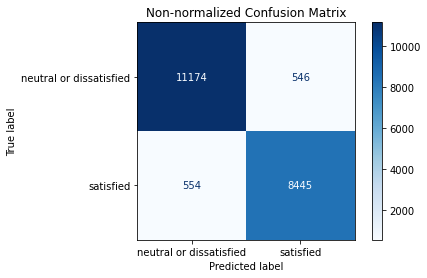

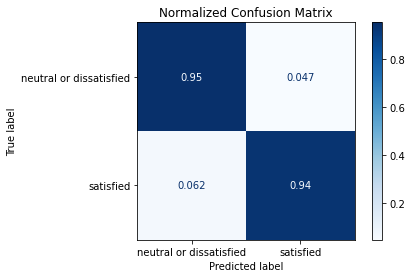

In [ ]:
np.set_printoptions(precision=2)
titles_options = [("Non-normalized Confusion Matrix", None), ("Normalized Confusion Matrix", 'true')]
class_names=["neutral or dissatisfied", "satisfied"]

# Plots confusion matrices.
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test, display_labels=class_names, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

plt.show()